In [22]:
train_path = "../data/MaSaC_train_efr.json"
test_path = "../data/MaSaC_test_efr.json"

test_labels='../data/MaSaC_test_efr_labels.json'

XGB CLASSIFIER

In [23]:
import json
import numpy as np
from xgboost import XGBClassifier


def read_json(path):
    train_list_ = []
    label_list_ = []
    with open(path, "r", encoding="utf-8") as file_read:
        data_line = json.loads(file_read.read())


        for idx, line_i in enumerate(data_line):

            for idx_i, speaker_i, utterances_i, emotion_i, trigger_i in zip(range(len(line_i['speakers'])),
                                                                            line_i['speakers'],
                                                                            line_i['utterances'],
                                                                            line_i['emotions'], line_i['triggers']):
                if idx_i == len(line_i['speakers']) - 1:
                    line_emo = [label_name.index(emotion_i), label_name.index(first_emotion),
                                label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 2:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 3:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]), label_name.index(first_emotion)]
                else:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]),
                                label_name.index(line_i['emotions'][idx_i + 3])]

                try:
                    label_list_.append(int(trigger_i))

                    train_list_.append(line_emo)


                except Exception as e:
                    pass



    return np.array(train_list_), np.array(label_list_)


def read_json_test(path):
    train_list_ = []
    with open(path, "r", encoding="utf-8") as file_read:
        data_line = json.loads(file_read.read())

        for idx, line_i in enumerate(data_line):


            for idx_i, speaker_i, utterances_i, emotion_i in zip(range(len(line_i['speakers'])),
                                                                 line_i['speakers'],
                                                                 line_i['utterances'],
                                                                 line_i['emotions']):
                if idx_i == len(line_i['speakers']) - 1:
                    line_emo = [label_name.index(emotion_i), label_name.index(first_emotion),
                                label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 2:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 3:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]), label_name.index(first_emotion)]
                else:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]),
                                label_name.index(line_i['emotions'][idx_i + 3])]

                train_list_.append(line_emo)

    return np.array(train_list_)


if __name__ == '__main__':
    label_name = ['-1', 'disgust', 'contempt', 'anger', 'neutral', 'joy', 'sadness', 'fear', 'surprise']

    first_emotion = "-1"



    X_train, y_train = read_json(train_path)

    X_test = read_json_test(test_path)

#2 is optimal
    model = XGBClassifier(scale_pos_weight=2, random_state=42)


    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    from sklearn.metrics import f1_score
    import json

    # Load the JSON data from the file
    with open(test_labels, 'r') as file:
        data = json.load(file)

    # Initialize an empty list to store the labels
    labels_list = []

    # Iterate through each entry in the JSON data
    for entry in data:
        # Extract the labels from the current entry and convert them to float
        labels_list.extend([float(label) for label in entry['labels']])


    answer_list=[]
    for pred_i in y_pred:

        answer_list.append(pred_i)

    f1 = f1_score(labels_list,answer_list)

    # Print the F1 score
    print("F1 Score:", f1)

F1 Score: 0.7915106117353308


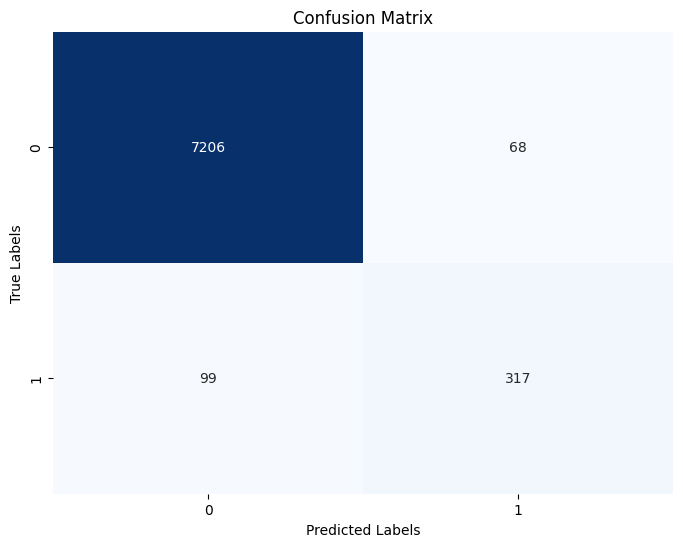

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(labels_list, answer_list)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


RANDOM FOREST CLASSIFIER

In [25]:
from sklearn.ensemble import RandomForestClassifier
import joblib
import json
import numpy as np

# Save the trained model


def read_json(path):
    train_list_ = []
    label_list_ = []
    with open(path, "r", encoding="utf-8") as file_read:
        data_line = json.loads(file_read.read())


        for idx, line_i in enumerate(data_line):


            for idx_i, speaker_i, utterances_i, emotion_i, trigger_i in zip(range(len(line_i['speakers'])),
                                                                            line_i['speakers'],
                                                                            line_i['utterances'],
                                                                            line_i['emotions'], line_i['triggers']):
                if idx_i == len(line_i['speakers']) - 1:
                    line_emo = [label_name.index(emotion_i), label_name.index(first_emotion),
                                label_name.index(first_emotion), label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 2:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(first_emotion), label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 3:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]), label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 4:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]), label_name.index(line_i['emotions'][idx_i + 3]),  label_name.index(first_emotion)]
                else:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]),
                                label_name.index(line_i['emotions'][idx_i + 3]),
                                label_name.index(line_i['emotions'][idx_i + 4])]

                try:
                    label_list_.append(int(trigger_i))

                    train_list_.append(line_emo)


                except Exception as e:
                    pass



    return np.array(train_list_), np.array(label_list_)


def read_json_test(path):
    train_list_ = []
    with open(path, "r", encoding="utf-8") as file_read:
        data_line = json.loads(file_read.read())

        for idx, line_i in enumerate(data_line):

            for idx_i, speaker_i, utterances_i, emotion_i in zip(range(len(line_i['speakers'])),
                                                                 line_i['speakers'],
                                                                 line_i['utterances'],
                                                                 line_i['emotions']):
                if idx_i == len(line_i['speakers']) - 1:
                    line_emo = [label_name.index(emotion_i), label_name.index(first_emotion),
                                label_name.index(first_emotion), label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 2:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(first_emotion), label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 3:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]), label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 4:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]), label_name.index(line_i['emotions'][idx_i + 3]), label_name.index(first_emotion)]
                else:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]),
                                label_name.index(line_i['emotions'][idx_i + 3]),
                                label_name.index(line_i['emotions'][idx_i + 4])]

                train_list_.append(line_emo)

    return np.array(train_list_)


if __name__ == '__main__':
    label_name = ['-1', 'disgust', 'contempt', 'anger', 'neutral', 'joy', 'sadness', 'fear', 'surprise']

    first_emotion = "-1"


    X_train, y_train = read_json(train_path)

    X_test = read_json_test(test_path)
    f1_list=[]

      # Define the Random Forest

    rf_clf = RandomForestClassifier(n_estimators=19, random_state=42)

    # Train the classifier
    rf_clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rf_clf.predict(X_test)


    from sklearn.metrics import f1_score
    import json

    # Load the JSON data from the file
    with open(test_labels, 'r') as file:
        data = json.load(file)

    # Initialize an empty list to store the labels
    labels_list = []

    # Iterate through each entry in the JSON data
    for entry in data:
        # Extract the labels from the current entry and convert them to float
        labels_list.extend([float(label) for label in entry['labels']])


    answer_list=[]
    for pred_i in y_pred:

        answer_list.append(pred_i)

    f1 = f1_score(labels_list,answer_list)

    # Print the F1 score
    print("F1 Score:", f1)
    f1_list.append(f1)





F1 Score: 0.783817951959545


SVC CLASSIFIER

In [26]:
import json
import numpy as np
from sklearn.svm import SVC


def read_json(path):
    train_list_ = []
    label_list_ = []
    with open(path, "r", encoding="utf-8") as file_read:
        data_line = json.loads(file_read.read())


        for idx, line_i in enumerate(data_line):


            for idx_i, speaker_i, utterances_i, emotion_i, trigger_i in zip(range(len(line_i['speakers'])),
                                                                            line_i['speakers'],
                                                                            line_i['utterances'],
                                                                            line_i['emotions'], line_i['triggers']):
                if idx_i == len(line_i['speakers']) - 1:
                    line_emo = [label_name.index(emotion_i), label_name.index(first_emotion),
                                label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 2:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 3:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]), label_name.index(first_emotion)]
                else:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]),
                                label_name.index(line_i['emotions'][idx_i + 3])]

                try:
                    label_list_.append(int(trigger_i))

                    train_list_.append(line_emo)


                except Exception as e:
                    pass



    return np.array(train_list_), np.array(label_list_)


def read_json_test(path):
    train_list_ = []
    with open(path, "r", encoding="utf-8") as file_read:
        data_line = json.loads(file_read.read())

        for idx, line_i in enumerate(data_line):

            for idx_i, speaker_i, utterances_i, emotion_i in zip(range(len(line_i['speakers'])),
                                                                 line_i['speakers'],
                                                                 line_i['utterances'],
                                                                 line_i['emotions']):
                if idx_i == len(line_i['speakers']) - 1:
                    line_emo = [label_name.index(emotion_i), label_name.index(first_emotion),
                                label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 2:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 3:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]), label_name.index(first_emotion)]
                else:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]),
                                label_name.index(line_i['emotions'][idx_i + 3])]

                train_list_.append(line_emo)

    return np.array(train_list_)


if __name__ == '__main__':
    label_name = ['-1', 'disgust', 'contempt', 'anger', 'neutral', 'joy', 'sadness', 'fear', 'surprise']

    first_emotion = "-1"



    X_train, y_train = read_json(train_path)

    X_test = read_json_test(test_path)



    svm_clf = SVC(kernel='linear', C=1, random_state=42)


    svm_clf.fit(X_train, y_train)

    y_pred = svm_clf.predict(X_test)

    from sklearn.metrics import f1_score
    import json

    # Load the JSON data from the file
    with open(test_labels, 'r') as file:
        data = json.load(file)

    # Initialize an empty list to store the labels
    labels_list = []

    # Iterate through each entry in the JSON data
    for entry in data:
        # Extract the labels from the current entry and convert them to float
        labels_list.extend([float(label) for label in entry['labels']])


    answer_list=[]
    for pred_i in y_pred:

        answer_list.append(pred_i)

    f1 = f1_score(labels_list,answer_list)

    # Print the F1 score
    print("F1 Score:", f1)
    f1_list.append(f1)


F1 Score: 0.7450980392156863


LOGISTIC REGRESSION

In [27]:
import json
import numpy as np
from sklearn.linear_model import LogisticRegression



def read_json(path):
    train_list_ = []
    label_list_ = []
    with open(path, "r", encoding="utf-8") as file_read:
        data_line = json.loads(file_read.read())


        for idx, line_i in enumerate(data_line):


            for idx_i, speaker_i, utterances_i, emotion_i, trigger_i in zip(range(len(line_i['speakers'])),
                                                                            line_i['speakers'],
                                                                            line_i['utterances'],
                                                                            line_i['emotions'], line_i['triggers']):
                if idx_i == len(line_i['speakers']) - 1:
                    line_emo = [label_name.index(emotion_i), label_name.index(first_emotion),
                                label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 2:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 3:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]), label_name.index(first_emotion)]
                else:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]),
                                label_name.index(line_i['emotions'][idx_i + 3])]

                try:
                    label_list_.append(int(trigger_i))

                    train_list_.append(line_emo)


                except Exception as e:
                    pass



    return np.array(train_list_), np.array(label_list_)


def read_json_test(path):
    train_list_ = []
    with open(path, "r", encoding="utf-8") as file_read:
        data_line = json.loads(file_read.read())

        for idx, line_i in enumerate(data_line):

            for idx_i, speaker_i, utterances_i, emotion_i in zip(range(len(line_i['speakers'])),
                                                                 line_i['speakers'],
                                                                 line_i['utterances'],
                                                                 line_i['emotions']):
                if idx_i == len(line_i['speakers']) - 1:
                    line_emo = [label_name.index(emotion_i), label_name.index(first_emotion),
                                label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 2:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 3:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]), label_name.index(first_emotion)]
                else:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]),
                                label_name.index(line_i['emotions'][idx_i + 3])]

                train_list_.append(line_emo)

    return np.array(train_list_)


if __name__ == '__main__':
    label_name = ['-1', 'disgust', 'contempt', 'anger', 'neutral', 'joy', 'sadness', 'fear', 'surprise']

    first_emotion = "-1"


    X_train, y_train = read_json(train_path)

    X_test = read_json_test(test_path)


    LogisticRegressio = LogisticRegression()

    LogisticRegressio.fit(X_train, y_train)

    y_pred = LogisticRegressio.predict(X_test)

    # Initialize an empty list to store the labels
    labels_list = []

    # Iterate through each entry in the JSON data
    for entry in data:
        # Extract the labels from the current entry and convert them to float
        labels_list.extend([float(label) for label in entry['labels']])


    answer_list=[]
    for pred_i in y_pred:

        answer_list.append(pred_i)

    f1 = f1_score(labels_list,answer_list)

    # Print the F1 score
    print("F1 Score:", f1)
    f1_list.append(f1)



F1 Score: 0.6962552011095701


KNN CLASSIFIER

In [28]:
from sklearn.neighbors import KNeighborsClassifier
import json
import numpy as np




def read_json(path):
    train_list_ = []
    label_list_ = []
    with open(path, "r", encoding="utf-8") as file_read:
        data_line = json.loads(file_read.read())


        for idx, line_i in enumerate(data_line):


            for idx_i, speaker_i, utterances_i, emotion_i, trigger_i in zip(range(len(line_i['speakers'])),
                                                                            line_i['speakers'],
                                                                            line_i['utterances'],
                                                                            line_i['emotions'], line_i['triggers']):
                if idx_i == len(line_i['speakers']) - 1:
                    line_emo = [label_name.index(emotion_i), label_name.index(first_emotion),
                                label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 2:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 3:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]), label_name.index(first_emotion)]
                else:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]),
                                label_name.index(line_i['emotions'][idx_i + 3])]

                try:
                    label_list_.append(int(trigger_i))

                    train_list_.append(line_emo)


                except Exception as e:
                    pass



    return np.array(train_list_), np.array(label_list_)


def read_json_test(path):
    train_list_ = []
    with open(path, "r", encoding="utf-8") as file_read:
        data_line = json.loads(file_read.read())

        for idx, line_i in enumerate(data_line):

            for idx_i, speaker_i, utterances_i, emotion_i in zip(range(len(line_i['speakers'])),
                                                                 line_i['speakers'],
                                                                 line_i['utterances'],
                                                                 line_i['emotions']):
                if idx_i == len(line_i['speakers']) - 1:
                    line_emo = [label_name.index(emotion_i), label_name.index(first_emotion),
                                label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 2:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 3:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]), label_name.index(first_emotion)]
                else:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]),
                                label_name.index(line_i['emotions'][idx_i + 3])]

                train_list_.append(line_emo)

    return np.array(train_list_)


if __name__ == '__main__':
    label_name = ['-1', 'disgust', 'contempt', 'anger', 'neutral', 'joy', 'sadness', 'fear', 'surprise']

    first_emotion = "-1"


    X_train, y_train = read_json(train_path)

    X_test = read_json_test(test_path)

      # Create a KNN classifier with k=5(optimal)
    clf = KNeighborsClassifier(n_neighbors=5)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)


    from sklearn.metrics import f1_score
    import json

    # Load the JSON data from the file
    with open(test_labels, 'r') as file:
        data = json.load(file)

    # Initialize an empty list to store the labels
    labels_list = []

    # Iterate through each entry in the JSON data
    for entry in data:
        # Extract the labels from the current entry and convert them to float
        labels_list.extend([float(label) for label in entry['labels']])


    answer_list=[]
    for pred_i in y_pred:

        answer_list.append(pred_i)

    f1 = f1_score(labels_list,answer_list)

    # Print the F1 score
    print("F1 Score:", f1, )
    f1_list.append(f1)


F1 Score: 0.7783375314861462


GRADIENT BOOSTING CLASSIFIER

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
import json
import numpy as np




def read_json(path):
    train_list_ = []
    label_list_ = []
    with open(path, "r", encoding="utf-8") as file_read:
        data_line = json.loads(file_read.read())


        for idx, line_i in enumerate(data_line):


            for idx_i, speaker_i, utterances_i, emotion_i, trigger_i in zip(range(len(line_i['speakers'])),
                                                                            line_i['speakers'],
                                                                            line_i['utterances'],
                                                                            line_i['emotions'], line_i['triggers']):
                if idx_i == len(line_i['speakers']) - 1:
                    line_emo = [label_name.index(emotion_i), label_name.index(first_emotion),
                                label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 2:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 3:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]), label_name.index(first_emotion)]
                else:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]),
                                label_name.index(line_i['emotions'][idx_i + 3])]

                try:
                    label_list_.append(int(trigger_i))

                    train_list_.append(line_emo)


                except Exception as e:
                    pass



    return np.array(train_list_), np.array(label_list_)


def read_json_test(path):
    train_list_ = []
    with open(path, "r", encoding="utf-8") as file_read:
        data_line = json.loads(file_read.read())

        for idx, line_i in enumerate(data_line):

            for idx_i, speaker_i, utterances_i, emotion_i in zip(range(len(line_i['speakers'])),
                                                                 line_i['speakers'],
                                                                 line_i['utterances'],
                                                                 line_i['emotions']):
                if idx_i == len(line_i['speakers']) - 1:
                    line_emo = [label_name.index(emotion_i), label_name.index(first_emotion),
                                label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 2:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 3:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]), label_name.index(first_emotion)]
                else:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]),
                                label_name.index(line_i['emotions'][idx_i + 3])]

                train_list_.append(line_emo)

    return np.array(train_list_)


if __name__ == '__main__':
    label_name = ['-1', 'disgust', 'contempt', 'anger', 'neutral', 'joy', 'sadness', 'fear', 'surprise']

    first_emotion = "-1"



    X_train, y_train = read_json(train_path)

    X_test = read_json_test(test_path)


    # Create a gradient boosting classifier
    clf = GradientBoostingClassifier()

    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)


    # Initialize an empty list to store the labels
    labels_list = []

    # Iterate through each entry in the JSON data
    for entry in data:
        # Extract the labels from the current entry and convert them to float
        labels_list.extend([float(label) for label in entry['labels']])


    answer_list=[]
    for pred_i in y_pred:

        answer_list.append(pred_i)

    f1 = f1_score(labels_list,answer_list)

    # Print the F1 score
    print("F1 Score:", f1)
    f1_list.append(f1)



F1 Score: 0.7915106117353308


NAIVE BAYES CLASSIFIER

In [30]:
from sklearn.naive_bayes import GaussianNB

import json
import numpy as np




def read_json(path):
    train_list_ = []
    label_list_ = []
    with open(path, "r", encoding="utf-8") as file_read:
        data_line = json.loads(file_read.read())


        for idx, line_i in enumerate(data_line):


            for idx_i, speaker_i, utterances_i, emotion_i, trigger_i in zip(range(len(line_i['speakers'])),
                                                                            line_i['speakers'],
                                                                            line_i['utterances'],
                                                                            line_i['emotions'], line_i['triggers']):
                if idx_i == len(line_i['speakers']) - 1:
                    line_emo = [label_name.index(emotion_i), label_name.index(first_emotion),
                                label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 2:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 3:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]), label_name.index(first_emotion)]
                else:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]),
                                label_name.index(line_i['emotions'][idx_i + 3])]

                try:
                    label_list_.append(int(trigger_i))

                    train_list_.append(line_emo)


                except Exception as e:
                    pass



    return np.array(train_list_), np.array(label_list_)


def read_json_test(path):
    train_list_ = []
    with open(path, "r", encoding="utf-8") as file_read:
        data_line = json.loads(file_read.read())

        for idx, line_i in enumerate(data_line):

            for idx_i, speaker_i, utterances_i, emotion_i in zip(range(len(line_i['speakers'])),
                                                                 line_i['speakers'],
                                                                 line_i['utterances'],
                                                                 line_i['emotions']):
                if idx_i == len(line_i['speakers']) - 1:
                    line_emo = [label_name.index(emotion_i), label_name.index(first_emotion),
                                label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 2:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(first_emotion), label_name.index(first_emotion)]
                elif idx_i == len(line_i['speakers']) - 3:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]), label_name.index(first_emotion)]
                else:
                    line_emo = [label_name.index(emotion_i), label_name.index(line_i['emotions'][idx_i + 1]),
                                label_name.index(line_i['emotions'][idx_i + 2]),
                                label_name.index(line_i['emotions'][idx_i + 3])]

                train_list_.append(line_emo)

    return np.array(train_list_)


if __name__ == '__main__':
    label_name = ['-1', 'disgust', 'contempt', 'anger', 'neutral', 'joy', 'sadness', 'fear', 'surprise']

    first_emotion = "-1"


    X_train, y_train = read_json(train_path)

    X_test = read_json_test(test_path)


    # Create a Gaussian Naive Bayes classifier
    clf = GaussianNB()

    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)


    # Initialize an empty list to store the labels
    labels_list = []

    # Iterate through each entry in the JSON data
    for entry in data:
        # Extract the labels from the current entry and convert them to float
        labels_list.extend([float(label) for label in entry['labels']])


    answer_list=[]
    for pred_i in y_pred:

        answer_list.append(pred_i)

    f1 = f1_score(labels_list,answer_list)

    # Print the F1 score
    print("F1 Score:", f1)
    f1_list.append(f1)


F1 Score: 0.6164154103852596
